In [1]:
from jax import numpy as np
from jax import random

In [2]:
key = random.PRNGKey(0)

Generate a mixture of Gaussians

In [3]:
key+=1


# define mean and variances of two Gaussians
m1 = -5.0; s1 = 1.5
m2 = 2.0; s2 = 1.1
m3 = 3.0; s3 = 0.6
m4 = 7.0; s4 = 1.7
m5 = 9.0; s5 = 1.4
m6 = 15; s6 = 0.9
m7 = 18; s7 = 1.4
m8 = 23; s7 = 0.5

# Define weights
w1 = 3
w2 = 4
w3 = 2
w4 = 6
w5 = 3
w6 = 4
w7 = 3
w8 = 2
norm = w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8
w1, w2, w3, w4, w5, w6, w7, w8 = w1/norm, w2/norm, w3/norm, w4/norm, w5/norm, w6/norm, w7/norm, w8/norm

In [4]:
# number of samples
n_samples = 100000

In [5]:
# Generate some sample data, with proportions given by w1, w2, w3, ...
Effect = np.concatenate([m1 + s1*random.normal(key, (int(w1*n_samples),)), 
                         m2 + s2*random.normal(key, (int(w2*n_samples),)),
                         m3 + s3*random.normal(key, (int(w3*n_samples),)),
                         m4 + s4*random.normal(key, (int(w4*n_samples),)),
                         m5 + s5*random.normal(key, (int(w5*n_samples),)),
                         m6 + s6*random.normal(key, (int(w6*n_samples),)),
                         m7 + s7*random.normal(key, (int(w7*n_samples),))                         
                        ]
                         )

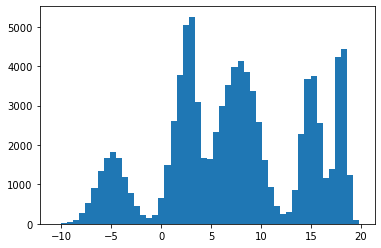

In [6]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(Effect, bins=50)
plt.show()

In [7]:
Effect.shape

(92590,)

In [8]:
# Sort the values and normalize them between 0 and 1

In [9]:
np.min(Effect)

DeviceArray(-10.653173, dtype=float32)

In [10]:
np.max(Effect)

DeviceArray(19.820847, dtype=float32)

In [11]:
Effect = np.sort(Effect)
Effect-=np.min(Effect)
Effect/=np.max(Effect)

In [12]:
print(np.min(Effect))
print(np.max(Effect))

0.0
1.0


In [13]:
# Compute the empirical CDF

In [14]:
from statsmodels.distributions.empirical_distribution import ECDF

In [15]:
ecdf = ECDF(Effect)

In [16]:
Cause = ecdf(Effect)


Make x-y plot, also showing the densities.

Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

In [17]:
# import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cause in the x-axis, Effect in the y-axis
x = Cause
y = Effect

# Add Kernel Density Estimation for smoother densities on x and y
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)

xx = np.linspace(0, 1, 1000)

In [18]:
import seaborn as sns
sns.set_style("white")

In [19]:
import os

In [20]:
figure_path = "/Users/luigigresele/Documents/Plots_IMA"

In [21]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, Locator, FixedLocator

In [22]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.7
mpl.rcParams['axes.edgecolor'] = 'b'

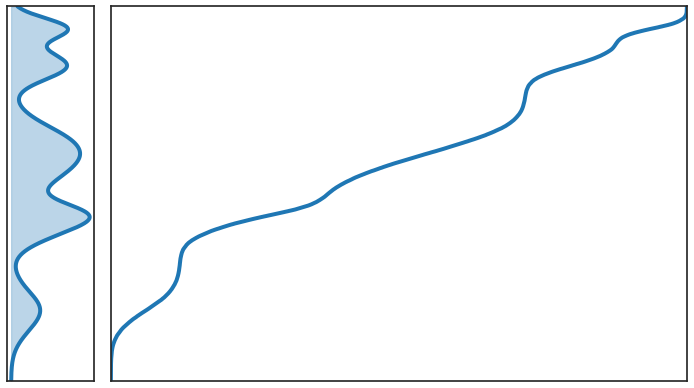

In [23]:
# definitions for the axes
left = 0.4
bottom = 0.4

# Width and height of the x-y plot
width, height = 1.0, 0.65

# Spacing between the axes of the x-y plot and the histograms:
spacing = 0.03


rect_scatter = [left, bottom, width, height]

# Distance from axes
distance = 0.15

rect_histy = [left - distance - spacing, bottom, 0.15, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

with sns.axes_style("white"):
    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.yaxis.set_ticks([])
    # Remove ticks from x axis
    ax_scatter.xaxis.set_ticks([])
    # Ticks only in 0.0 and 1.0
#     ax_scatter.xaxis.set_major_locator(FixedLocator([0.0, 1.0]))

ax_scatter.tick_params(direction='in', top=True, right=True, labelsize=35)

with sns.axes_style("white"):
    ax_histy = plt.axes(rect_histy)
    ax_histy.xaxis.set_ticks([])

# ax_histy.yaxis.grid(True) # Hide the horizontal gridlines
# ax_histy.xaxis.grid(False) # Show the vertical gridlines

ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
# ax_scatter.scatter(x, y)
with sns.axes_style("white"):
    ax_scatter.plot(x, y, linewidth=4)

# now determine nice limits by hand:
binwidth = 0.01
lim = 1
ax_scatter.set_xlim((0, 1))
ax_scatter.set_ylim((0, 1))

bins = np.arange(0, 1+binwidth, binwidth)

# Add KDE plot of the density for y
ax_histy.plot(kde_y(xx), xx,  color='C0', linewidth=4)
ax_histy.fill_betweenx(xx, kde_y(xx), # xx,
              color='C0', alpha=0.3)

# ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.savefig(os.path.join(figure_path, 'IGCI_plot.png'), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=True, bbox_inches='tight', pad_inches=0.1, metadata=None)

plt.savefig(os.path.join(figure_path, 'IGCI_plot.pdf'), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=True, bbox_inches='tight', pad_inches=0.1, metadata=None)

plt.show()

In [24]:
# Maybe we can still insert some text (not sure what the best notation is, cause/effect, observation/source, or something neutral), e.g.:

# p_x(x) for the density on the y-axis
# g(x) := F_X(x) = P(X<=x) for the function
# p_y(y) = 1 for the implied uniform density on the x-axis